# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## Task 1: Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [2]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1b) Projection
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 dimensions (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a figure with 3 subplots, one for every possible combination of the dataset's  dimensions (X vs Y, Y vs Z, and Z vs X). Each of these plots shows a different 2D __projection__ of the 3D dataset. 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 
  
3. Make sure each subplot has a title

In [3]:
gauss_data = np.genfromtxt('data/gauss_3d.csv', delimiter= ',')
print(gauss_data.shape)

(200, 3)


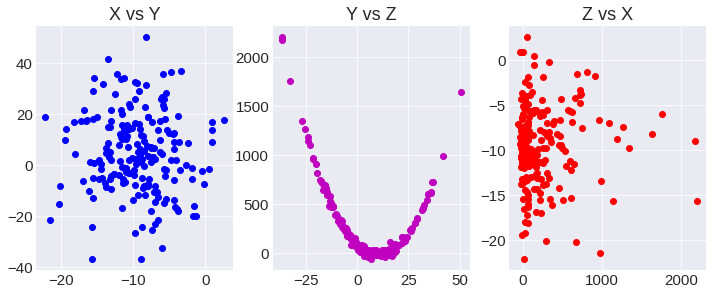

In [7]:
x = gauss_data[:,0]
y = gauss_data[:,1]
z = gauss_data[:,2]
fig , axs = plt.subplots(nrows = 1, ncols = 3)

axs[0].scatter(x,y, color = 'b')
axs[0].title.set_text('X vs Y')
axs[1].scatter(y,z, color = 'm')
axs[1].title.set_text('Y vs Z')
axs[2].scatter(z,x, color = 'r')
axs[2].title.set_text('Z vs X')

### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [14]:
ones = np.ones(gauss_data.shape[0]).reshape(gauss_data.shape[0],1)
gauss_data = np.hstack((gauss_data, ones))
print(gauss_data)

[[  -1.878   -1.013   73.627    1.   ]
 [ -13.059   17.36    41.08     1.   ]
 [ -12.641   -3.435  174.669    1.   ]
 [ -15.365   34.323  607.439    1.   ]
 [  -5.673  -14.979  598.393    1.   ]
 [ -21.508  -21.41   973.77     1.   ]
 [  -1.276  -19.761  817.145    1.   ]
 [ -13.806   -8.358  301.274    1.   ]
 [  -8.405  -11.787  470.952    1.   ]
 [ -11.247   34.341  605.098    1.   ]
 [  -2.689    0.103   75.917    1.   ]
 [ -20.301  -15.14   668.435    1.   ]
 [ -11.612   21.716  166.265    1.   ]
 [ -11.92    -3.798  173.865    1.   ]
 [  -4.331  -13.553  479.397    1.   ]
 [ -15.499   18.138    6.781    1.   ]
 [ -10.862   14.35   -15.52     1.   ]
 [ -14.389   -1.524  145.707    1.   ]
 [  -9.789   26.113  252.389    1.   ]
 [  -7.086    6.937  -57.971    1.   ]
 [ -15.503   29.254  350.007    1.   ]
 [  -4.276   12.541   31.791    1.   ]
 [  -5.492   28.382  313.531    1.   ]
 [  -7.488    6.641  -22.467    1.   ]
 [  -5.496  -13.296  579.077    1.   ]
 [ -13.419   41.741  993.

## Task 2: Translation

### 2a) Create the Translation Matrix

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print your matrix


In [20]:
translation_matrix = np.eye(gauss_data.shape[1])
translation_matrix[1,3] = 25
translation_matrix[2,3] = -1000
print(translation_matrix)

[[    1.     0.     0.     0.]
 [    0.     1.     0.    25.]
 [    0.     0.     1. -1000.]
 [    0.     0.     0.     1.]]


### 2b) Translate Data and Visualize Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and translated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the translated data in different colors.
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

In [25]:
#part 2
shifted_data = translation_matrix@gauss_data.T

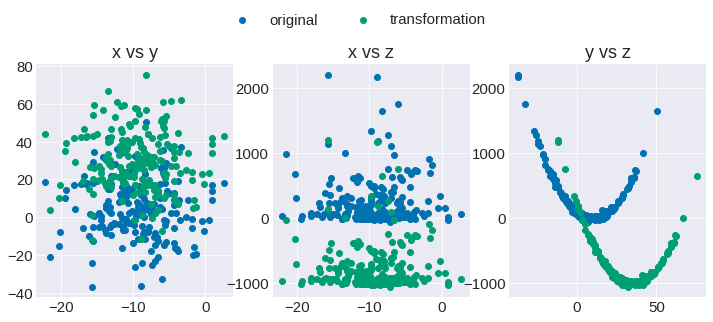

In [53]:
# part 3


def data_vs_translation(data, translation, variables_list):
    
    fig , axs = plt.subplots(nrows = 1, ncols = data.shape[1]-1)
    
    plts_made = 0
    
    label_list = []
    for index, var in enumerate(variables_list):
        
        if index < data.shape[1]-2:
        
            counter = index+1
            while(counter < data.shape[1]-1):
                
                orig_plt = axs[plts_made].scatter(data[:,index],data[:,counter], label = 'original')
                translation_plt = axs[plts_made].scatter(translation[:,index],translation[:,counter], label = 'transformation')
               
                axs[plts_made].title.set_text(f'{variables_list[index]} vs {variables_list[counter]}')
                if plts_made == 0:
                    label_list.append(orig_plt)
                    label_list.append(translation_plt)
                counter+=1
                plts_made += 1
    
    fig.legend(handles = label_list, loc='upper center', ncol=3)
    fig.subplots_adjust(top=0.80, bottom=0.08)
    
    return fig, axs

data_vs_translation(gauss_data, shifted_data.T, ['x','y','z'])
plt.show()

## Task 3: Scale

### 3a) Create a Scaling Matrix

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print the matrix

In [52]:
scale_matrix = np.eye(gauss_data.shape[1])
scale_matrix[0,0] = 3
scale_matrix[2,2] = 0.1
print(scale_matrix)

[[3.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  1. ]]


### 3b) Scale Data and Visualize the Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and scaled results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the scaled data in different colors.
  - <i>If you implemented a function in the previous step, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

In [54]:
#2
scaled_matrix = (scale_matrix@gauss_data.T).T
print(scaled_matrix)

[[ -5.634   -1.013    7.3627   1.    ]
 [-39.177   17.36     4.108    1.    ]
 [-37.923   -3.435   17.4669   1.    ]
 [-46.095   34.323   60.7439   1.    ]
 [-17.019  -14.979   59.8393   1.    ]
 [-64.524  -21.41    97.377    1.    ]
 [ -3.828  -19.761   81.7145   1.    ]
 [-41.418   -8.358   30.1274   1.    ]
 [-25.215  -11.787   47.0952   1.    ]
 [-33.741   34.341   60.5098   1.    ]
 [ -8.067    0.103    7.5917   1.    ]
 [-60.903  -15.14    66.8435   1.    ]
 [-34.836   21.716   16.6265   1.    ]
 [-35.76    -3.798   17.3865   1.    ]
 [-12.993  -13.553   47.9397   1.    ]
 [-46.497   18.138    0.6781   1.    ]
 [-32.586   14.35    -1.552    1.    ]
 [-43.167   -1.524   14.5707   1.    ]
 [-29.367   26.113   25.2389   1.    ]
 [-21.258    6.937   -5.7971   1.    ]
 [-46.509   29.254   35.0007   1.    ]
 [-12.828   12.541    3.1791   1.    ]
 [-16.476   28.382   31.3531   1.    ]
 [-22.464    6.641   -2.2467   1.    ]
 [-16.488  -13.296   57.9077   1.    ]
 [-40.257   41.741   99.3

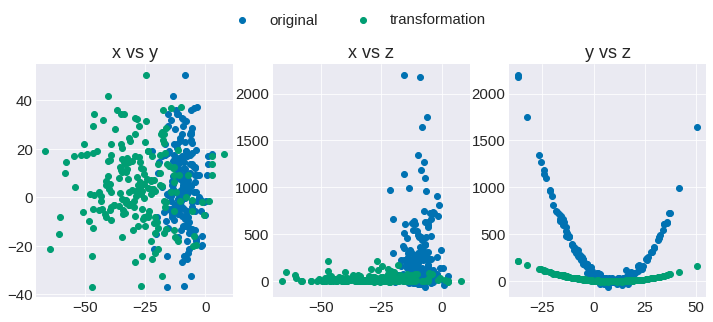

In [58]:
#part 3

data_vs_translation(gauss_data, scaled_matrix, ['x','y','z'])
plt.show()